In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
customer = pd.read_csv("C:\\Users\\piyum\\Documents\\python codes\\customer_data.csv")
customer = customer.drop(['fea_6', 'fea_11'], axis=1)

In [99]:
payment = pd.read_csv("C:\\Users\\piyum\\Documents\\python codes\\payment_data.csv")
payment = payment.drop(['prod_limit', 'report_date', 'update_date', 'prod_code'], axis=1)

In [101]:
combine = pd.merge(customer, payment ,on ='id')
combine

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_7,fea_8,fea_9,fea_10,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,new_balance,highest_balance
0,1,54982665,5,1245.5,3,77000.0,2,5,109,5,151300,0,0,0,0,9,6657.6,18934.0
1,1,54982665,5,1245.5,3,77000.0,2,5,109,5,151300,0,0,0,0,18,153792.0,149387.0
2,1,54982665,5,1245.5,3,77000.0,2,5,109,5,151300,0,0,0,0,1,0.0,150500.0
3,1,54982665,5,1245.5,3,77000.0,2,5,109,5,151300,0,2,26,11906,6,0.0,46371.0
4,0,59004779,4,1277.0,1,113000.0,2,-1,100,3,341759,0,0,0,0,4,15120.0,21500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,5,90,5,72000,0,0,0,0,10,0.0,35500.0
8246,0,58998054,4,1250.0,3,137000.0,2,5,90,5,72000,0,0,0,0,1,-121.2,601.0
8247,0,54989781,4,1415.0,3,93000.0,2,5,113,4,151300,0,0,0,0,12,334130.4,2400500.0
8248,0,54989781,4,1415.0,3,93000.0,2,5,113,4,151300,0,0,0,0,7,456098.4,406938.0


In [103]:
combine = combine.drop(['id'],axis=1)

In [105]:
def get_missing_data(df):
    total= df.isnull().sum().sort_values(ascending = False)
    percentage = ( df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    percentage = round(percentage,2)
    missing_df = pd.concat([total,percentage],axis=1,keys=['Total','percentage'])
    print(missing_df.head(20))
    return None

In [107]:
get_missing_data(combine)

                 Total  percentage
fea_2             1028       12.46
highest_balance    409        4.96
fea_10               0        0.00
new_balance          0        0.00
pay_normal           0        0.00
OVD_sum              0        0.00
OVD_t3               0        0.00
OVD_t2               0        0.00
OVD_t1               0        0.00
label                0        0.00
fea_1                0        0.00
fea_8                0        0.00
fea_7                0        0.00
fea_5                0        0.00
fea_4                0        0.00
fea_3                0        0.00
fea_9                0        0.00


In [109]:
cus=customer["label"].value_counts()
df=pd.DataFrame({'labels':cus.index,
                 'values': cus.values})

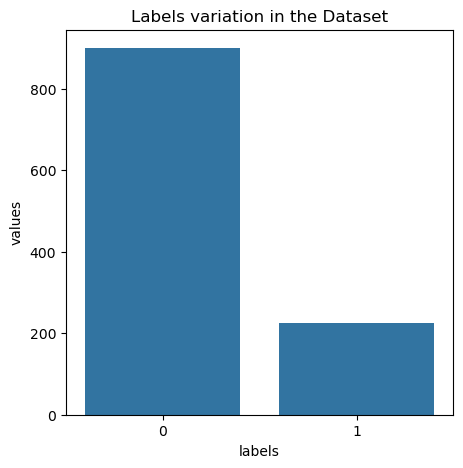

In [111]:
plt.figure(figsize = (5,5))
plt.title('Labels variation in the Dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values" , data = df)
locs,labels = plt.xticks()
plt.show()

In [113]:
correlations = combine.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

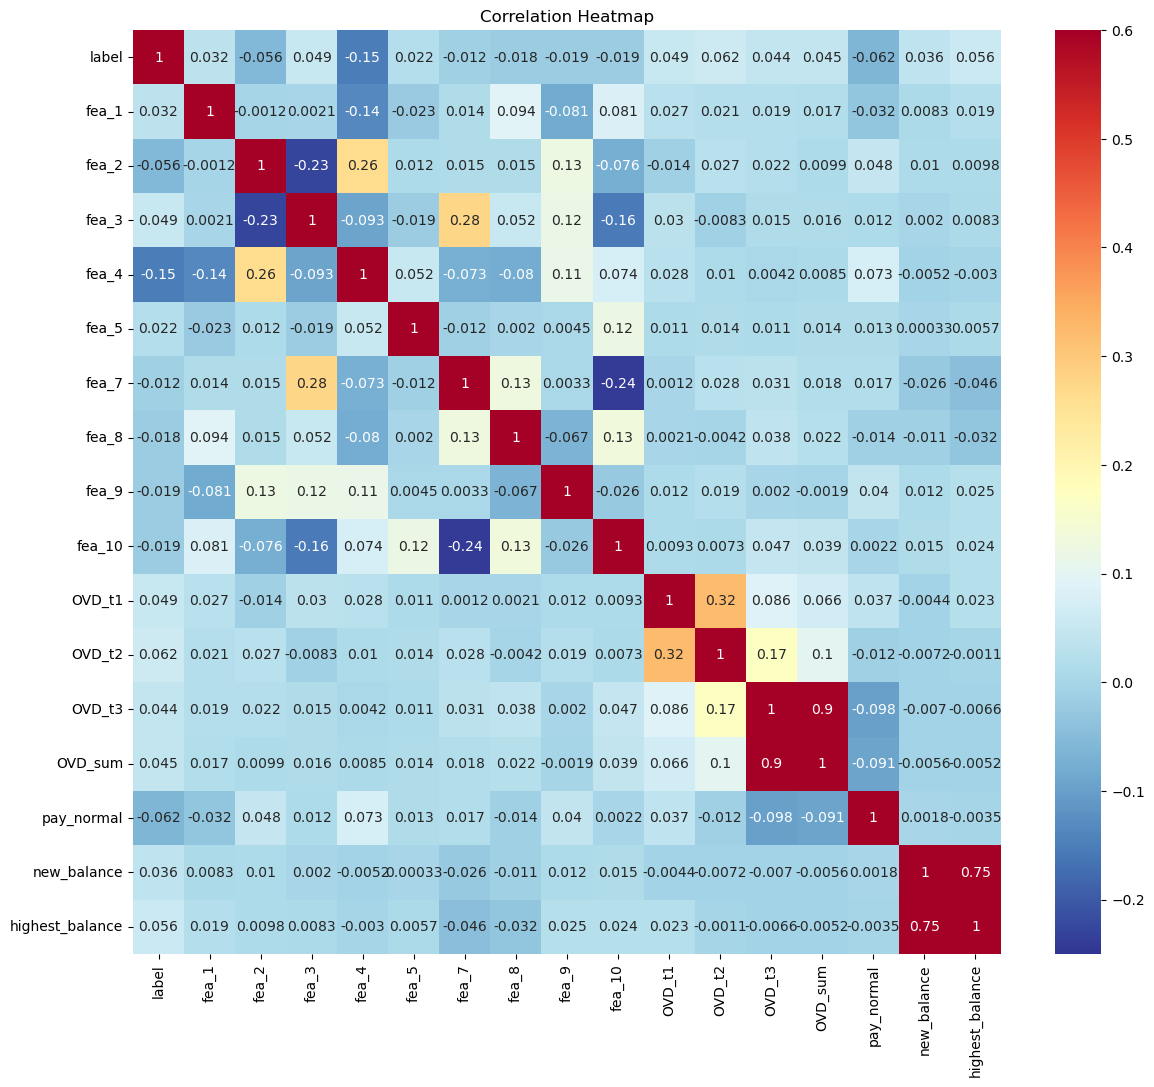

In [115]:
plt.figure(figsize = (14,12))
sns.heatmap(correlations,cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')